In [2]:
!pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.32 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
altair 5.4.1 requires typing-extensions>=4.10.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
mypy 1.11.2 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
openai 1.66.3 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.8.2 requires t

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
X_train.shape 

(60000, 28, 28)

In [7]:
# Step 2: Preprocess the data
# Normalize the pixel values to be in the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28)

In [8]:
# Flatten the 28x28 images into 1D arrays of 784 pixels for each image
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
X_train.shape 

(60000, 784)

In [6]:
# Step 3: Build the Neural Network model
model = models.Sequential([
    layers.InputLayer(input_shape=(28 * 28,)),  # Input layer for 784 input nodes
    layers.Dense(128, activation='relu'),       # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),        # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(10, activation='softmax')      # Output layer with 10 neurons (for 10 classes) and softmax activation
])

In [7]:
# Step 4: Compile the model
model.compile(optimizer='adam',               # Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])          # Metrics to evaluate during training

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the accuracy on the test set
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
1500/1500 [==============================] - 1s 545us/step - loss: 0.2696 - accuracy: 0.9203 - val_loss: 0.1481 - val_accuracy: 0.9563
Epoch 2/10
1500/1500 [==============================] - 1s 498us/step - loss: 0.1144 - accuracy: 0.9654 - val_loss: 0.1072 - val_accuracy: 0.9670
Epoch 3/10
1500/1500 [==============================] - 1s 499us/step - loss: 0.0781 - accuracy: 0.9755 - val_loss: 0.0875 - val_accuracy: 0.9732
Epoch 4/10
1500/1500 [==============================] - 1s 497us/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.1036 - val_accuracy: 0.9693
Epoch 5/10
1500/1500 [==============================] - 1s 498us/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.0883 - val_accuracy: 0.9745
Epoch 6/10
1500/1500 [==============================] - 1s 523us/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.1115 - val_accuracy: 0.9684
Epoch 7/10
1500/1500 [==============================] - 1s 501us/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.1031 -

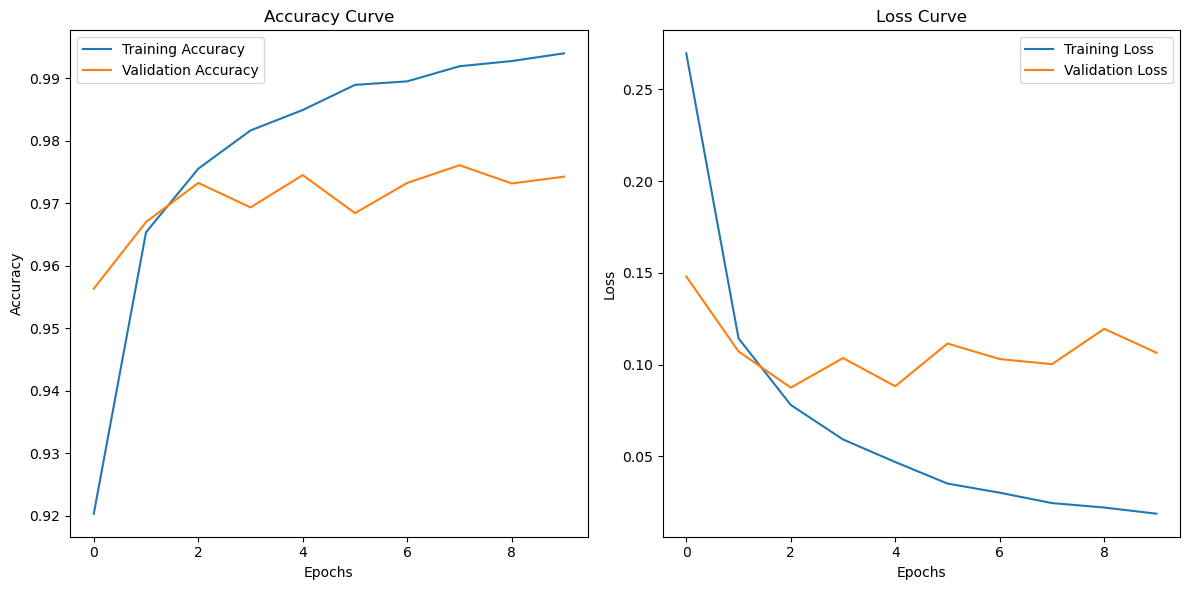

In [8]:
# Step 7: Plot the accuracy and loss curves
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()